# Derivatives

## Tips

  * Use __esc r__ to disable a cell
  * Use __esc y__ to reactivate it
  * Use __esc m__ to go to markdown mode
  * Shift + return to execute a cell

## Goal

The purpose of this notebook is to help you understand the concept of a __derivative__.

## Introduction

As we have learned, a vector has two attributes, a magnitude and a direction. Vectors can be constant, that is, neither their magitudes nor their directions change with time. If, however, a vector $\vec{A}$ can change in time, we highlight this possibility by writing $\vec{A}(t)$ in analogy to the way we write a function such as $f(x) = \sin(x)$. 

The position $\vec{r}(t)$ and velocity $\vec{v}(t)$ of a particle (i.e., a point object) are the vectors we'll use to describe the motion of objects. Consider the motion of a ball thrown vertically upwards assuming that we can approximate a ball as a particle. On the way up, the direction of the velocity of the ball points upwards and remains the same until the ball reaches its maximum height above the ground. On the way down, the direction of the velocity points downwards. On the way up the magnitude of the velocity decreases until it reaches zero at the maximum height and then increases from zero as the ball descends. Time-dependent positions and velocities are the norm in the universe. Therefore, we need a way to describe vectors that change in time.

__Newton's second law of motion__ is $\vec{F} = m \vec{a}$, where $\vec{F}$ is the sum of all forces acting on a particle of mass $m$ (Kg in SI units) and $\vec{a}$ is the particle's acceleration. That law can be rewritten as the two equations

\begin{align}
    \frac{d\vec{r}}{dt} & = \vec{v}, \\
    \frac{d\vec{v}}{dt} & = \frac{1}{m} \vec{F} .
\end{align}

By definition, the acceleration $\vec{a}$ is the __derivative__ $d\vec{v} / dt$. One of our goals is to understand what this means. As you can see, for a given total force, the larger the mass the smaller the acceleration. This shows that mass is a measure of the "resistance" of a particle to being moved by a force. The technical term for this "resistance" is __inertia__. The two equations above are examples of first order differential equations (ODE).
By the end of the semester, you'll be very good at solving these equations numerically. By solving we mean finding $\vec{r}(t_n)$ and $\vec{v}((t_n)$ for every particle in the physical system, for example, every star in a star cluster, at a sequence of $N$ timestamps, $t_n = n \Delta t, n = 0, \cdots, N$, where $\Delta t$ denotes a small time increment.

Once you are familiar with derivatives and Taylor series expansions, we'll be able to construct a good numerical approximation to Newton's second law of motion. 

### Import modules 
Make Python modules (that is, collections of programs) available to this notebook.


In [1]:
import os, sys
import numpy as np
import matplotlib as mp
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import sympy as sm
import scipy as sp
#import pandas as pd
#import vpython as vp
#import itertools as it

sm.init_printing()        # activate "pretty printing" of symbolic expressions
%matplotlib inline

# update fonts
FONTSIZE = 14
font = {'family' : 'sans-serif',
        'weight' : 'normal',
        'size'   : FONTSIZE}
mp.rc('font', **font)

# use latex if available on system, otherwise set usetex=False
mp.rc('text', usetex=True)

# use JavaScript for rendering animations
mp.rc('animation', html='jshtml')

# set a seed to ensure reproducibility 
# on a given machine
seed = 314159
rnd  = np.random.RandomState(seed)

## What is a derivative?

What does the symbol

\begin{align}
\frac{d\vec{r}}{dt}
\end{align}

mean? Let's answer this question by answering two questions: 1) what is a function and 2) what is a derivative? 

## What is a function?

A function, $f(x)$, as we have noted earlier takes a value $x$ and returns a value $y = f(x)$. For example, if we enter the value $x = 2$ in the function $f(x) = x^2 \, / \, 10$, the function
$f$ returns the value $y = 0.4$. 

We can think of a function as a large collection of tuples $(x, y)$, where for every $x$ we associate a $y$. If $x$ is a continuous variable, roughly speaking there are no gaps between the values of $x$, and if $f(x)$ is also continuous, then so too are its values $y$. The set of tuples $\{ (x, y) \}$ (which for a continuous function contains an uncountably infinite number of elements) forms a __graph__, as shown below.

### $f(x) = x^2 \, / \, 10$

Since $f(x)$ is a simple function, we'll use the Python __lambda__ construct to define the function.

In [2]:
f = lambda x: x**2 / 10

x = 2
y = f(x)
x, y

### Plot graph of $f(x)$

Note the use of a simple object (bag) to collect together constants, variables, and objects. Some of the contents of the bag will become clear later.

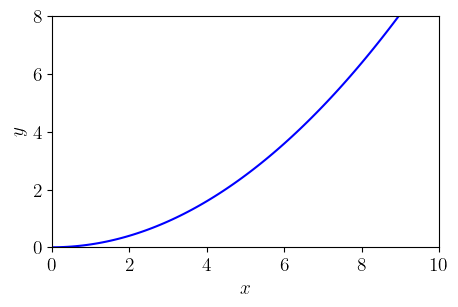

In [3]:
# create a very simple class
class Bag:
    pass

# make an empty bag
bag = Bag()

# add items to the bag, modeled as attributes of the bag
bag.f = f                   # store function in bag

# add graphics parameters
bag.xmin = 0  
bag.xmax = 10
bag.xbins= 100

# add point at which to approximate derivative
# and the the initial value of "h"
bag.x    = 3
bag.h    = 4

bag.ymin = 0
bag.ymax = 8

bag.color= 'blue'
bag.fontsize = 14
bag.figsize  = (5, 3)
bag.plot_points = False

def plot_function(bag):
    '''
 
    Example

    >>> plot_function(bag) 
    '''

    bag.fig, bag.ax = plt.subplots(figsize=bag.figsize)
    
    # get items from bag
    fig, ax = bag.fig, bag.ax
    
    xmin = bag.xmin
    xmax = bag.xmax
    xbins= bag.xbins
    
    ymin = bag.ymin
    ymax = bag.ymax
    
    color  = bag.color
    ftsize = bag.fontsize
    fgsize = bag.figsize
    
    f = bag.f
    
    # compute y = f(x) at equally-spaced values of x
    # ------------------------------------------------
    x = np.linspace(xmin, xmax, xbins+1)
    y = f(x)

    # define domain of graph
    ax.set_xlim(xmin, xmax)
    
    # define range of graph
    ax.set_ylim(ymin, ymax)
        
    # annotate axes
    ax.set_xlabel('$x$', fontsize=ftsize)
    ax.set_ylabel('$y$', fontsize=ftsize)

    # create an empty list for the "artists", that is, graphics
    # objects.
    obj = []
    
    # return plot object (here called plot1)
    plot1, = ax.plot(x, y, color=color, label='$y = f(x)$')
    obj.append(plot1) # cache plot for later
    
    if bag.plot_points:
        
        # draw points
        x1 = bag.x
        x2 = bag.x + bag.h
        y1 = f(x1)
        y2 = f(x2)
        
        # plot points on graph
        x = [x1, x2]
        y = [y1, y2]
        scat1 = ax.scatter(x, y, color='red')
        obj.append(scat1)
        
        # plot a horizontal line
        x = [x1, x2]
        y = [y1, y1]
        plot2, = ax.plot(x, y, color='green')
        obj.append(plot2)
        
        # plot a vector line 
        x = [x2, x2]
        y = [y1, y2]
        plot3, = ax.plot(x, y, color='green')
        obj.append(plot3)
        
        # draw a line segment through the points (y = m * x + c)
        DyDx= (y2-y1)/(x2-x1) # approximate gradient (same as "m")
        c   = y1 - DyDx * x1  # compute offset of line
        # compute points that define end points of line segment
        xx1 = x1 - 1
        xx2 = x2 + 1
        yy1 = DyDx * xx1 + c
        yy2 = DyDx * xx2 + c
        x = [xx1, xx2]
        y = [yy1, yy2]
        plot4, = ax.plot(x, y, color='black')
        obj.append(plot4)
        
        # annotate plot
        text1 = ax.text(0.6, 6.5, f'$h = {bag.h:8.4f}$')
        obj.append(text1)
        
        text2 = ax.text(0.6, 5.5, f'$[f(x+h) - f(x)]/h = {DyDx:8.4f}$')
        obj.append(text2)
        
        bag.obj = obj

plot_function(bag)

## What is a derivative?

The derivative of a function $f(x)$ at $x$, which can be expressed using several different symbols including $df/dx$, $Df$, $\dot{f}$, and $f^{(1)}$, is the following ratio

\begin{align}
    \frac{df}{dx} = \frac{f(x+h) - f(x)}{h},
\end{align}

where $h$ is an __infinitely small number__. Roughly speaking, an infinitely small number, $h$, is any number bigger than zero that is smaller than any number you can think of! These infinitely small numbers are called __infinitesimals__.

We can write the definition above in a more intutive way. First, define $x^\prime = x + h$, where $x^\prime$ is by definition a number that is infinitely close to $x$.  Letting $y^\prime = f(x^\prime)$, and noting that $y = f(x)$, we can rewrite the definition of a derivative as

\begin{align}
    \frac{df}{dx} = \frac{y^\prime - y}{x^\prime - x}.
\end{align}

The natural interpretation of the above formula is that the derivative of a function $f(x)$ is the __gradient__, that is, the slope of the graph of $f(x)$ at $x$. 

To see and example of this, let's compute the derivative of the function $f(x) = x^2 \, / \, 10$ at $x = 3$ numerically. Later, we'll compute the derivative symbolically. In numerical work, we need to choose a finite, albeit small, value for $h$. That means our calculation of the derivative will not be exact because our choice of $h$ will never be infinitely small. But we expect that the smaller we make $h$ the more accurate our calculation. 

In practice, what we'll do is to start with a relatively large value of $h$, say $h = 4$, compute the ratio

\begin{align}
    \frac{f(x+h) - f(x)}{h},
\end{align}

and repeat the calculation with smaller and smaller values of $h$. The plot below shows our first rough approximatation to the derivative at $x = 3$.

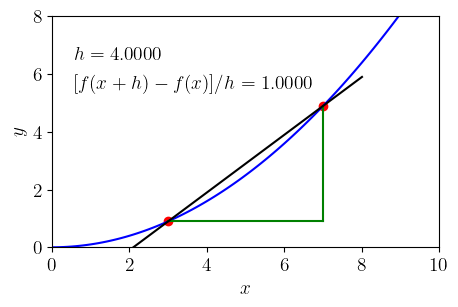

In [4]:
bag.plot_points = True
plot_function(bag)

Now let's keep computing our approximation to the derivative using smaller and smaller values of $h$. Define a sequence of values of $h$ (called interval) and add the sequence to the bag.

In [5]:
bag.interval = np.arange(4, 0, -0.02)
bag.interval

array([4.  , 3.98, 3.96, 3.94, 3.92, 3.9 , 3.88, 3.86, 3.84, 3.82, 3.8 ,
       3.78, 3.76, 3.74, 3.72, 3.7 , 3.68, 3.66, 3.64, 3.62, 3.6 , 3.58,
       3.56, 3.54, 3.52, 3.5 , 3.48, 3.46, 3.44, 3.42, 3.4 , 3.38, 3.36,
       3.34, 3.32, 3.3 , 3.28, 3.26, 3.24, 3.22, 3.2 , 3.18, 3.16, 3.14,
       3.12, 3.1 , 3.08, 3.06, 3.04, 3.02, 3.  , 2.98, 2.96, 2.94, 2.92,
       2.9 , 2.88, 2.86, 2.84, 2.82, 2.8 , 2.78, 2.76, 2.74, 2.72, 2.7 ,
       2.68, 2.66, 2.64, 2.62, 2.6 , 2.58, 2.56, 2.54, 2.52, 2.5 , 2.48,
       2.46, 2.44, 2.42, 2.4 , 2.38, 2.36, 2.34, 2.32, 2.3 , 2.28, 2.26,
       2.24, 2.22, 2.2 , 2.18, 2.16, 2.14, 2.12, 2.1 , 2.08, 2.06, 2.04,
       2.02, 2.  , 1.98, 1.96, 1.94, 1.92, 1.9 , 1.88, 1.86, 1.84, 1.82,
       1.8 , 1.78, 1.76, 1.74, 1.72, 1.7 , 1.68, 1.66, 1.64, 1.62, 1.6 ,
       1.58, 1.56, 1.54, 1.52, 1.5 , 1.48, 1.46, 1.44, 1.42, 1.4 , 1.38,
       1.36, 1.34, 1.32, 1.3 , 1.28, 1.26, 1.24, 1.22, 1.2 , 1.18, 1.16,
       1.14, 1.12, 1.1 , 1.08, 1.06, 1.04, 1.02, 1.

In [6]:
bag.plot_points = True
plot_function(bag)

# don't show above plot
plt.close()

# the following function is called repeatedly to update the plot by
# giving updated data to each of the artists created in plot_function
# and cached in bag.interval. The function update(...) is an example
# of a type of function called a callback. All graphical user interfaces
# (GUI) are built using callbacks. For example, when you click on an icon, 
# this launches a callback to process the click.

def update(frame):
    
    # make sure that the bag is visible to this function
    global bag
    
    # get current value of h
    h = bag.interval[frame]
    
    # get function
    f = bag.f
    
    # get artists
    plot1, scat1, plot2, plot3, plot4, text1, text2 = bag.obj

    # draw points
    x1 = bag.x
    x2 = bag.x + h
    y1 = f(x1)
    y2 = f(x2)
    d  = [[x1, y1], 
          [x2, y2]]
    scat1.set_offsets(d)

    # draw horizontal line
    x  = [x1, x2]
    y  = [y1, y1]
    plot2.set_data(x, y)

    # draw vertical line
    x  = [x2, x2]
    y  = [y1, y2]
    plot3.set_data(x, y)

    # draw a line through the points
    DyDx= (y2-y1)/(x2-x1) # approximate gradient
    c   = y1 - DyDx * x1
    xx1 = x1-3
    xx2 = x2+3
    yy1 = DyDx * xx1 + c
    yy2 = DyDx * xx2 + c
    x   = [xx1, xx2]
    y   = [yy1, yy2]
    plot4.set_data(x, y)

    # update annotation
    text1.set_text('$h = %8.3f$' % h)
    text2.set_text('$[f(x+h) - f(x)]/h = %8.3f$' % DyDx)

    # IMPORTANT: must return artists for them to be updated!
    return bag.obj
    
    
# initialize animated plot
nframes = len(bag.interval)

ani = FuncAnimation(fig=bag.fig, 
                    func=update, 
                    repeat=False, 
                    frames=nframes, 
                    interval=50)
# these two line are needed to render the graphics
plt.show()
ani

## Symbol calculation of derivatives

Recall that the *exact* formula for a derivative is

\begin{align}
    \frac{f(x+h) - f(x)}{h},
\end{align}

when $h$ is infinitely small. 

### Example 1: $f(x) = x^2 \, / \, 10$
Let's apply this formula to $(x) = x^2 \, / \, 10$. This requires the calculation of $f(x + h)$:

\begin{align}
    f(x+h) & = (x + h)^2 \, /\, 10,\nonumber\\
            & = (x^2 + 2 h x + h^2)/10, \nonumber\\
            & = x^2 / 10 + 2 h x / 10, \nonumber\\
            & = f(x) + 2 h x / 10.
\end{align}

Why are we allowed to drop the $h^2$ term? This is because the  $h^2$ term is infinitely smaller than that involving $h$. Therefore, the result above is not an approximation but an *exact* result! After rearranging the result we find the following exact result for the derivative at any value of $x$,

\begin{align}
    \frac{df}{dx} & = \frac{f(x+h) - f(x)}{h},\nonumber\\
    & = 2 x / 10.
\end{align}

In particular, the derivative at $x = 3$ is exactly 0.6, which is to be compared with our approximate result of 0.602.

### Example 2: $f(x) = a x^n$

We need to compute $f(x + h) = a (x + h)^n$. Let's assume that $n > 1$ is an integer. The calculation is made simpler by noting the fact that we need only consider the terms involving $h$ since all other terms involving higher powers of $h$ are at least infinitely smaller than terms involving $h$. Follow the algebraic sequence below and convince yourself it is correct.

\begin{align}
    f(x+h)  & = a (x + h)^n,\nonumber\\
            & = a (x + h)(x+h)(x+h)^{n-2},\nonumber\\
            & = a (x^2 + 2 h x )(x+h)^{n-2},\nonumber\\
            & = a (x^2 + 2 h x )(x + h)(x+h)^{n-3},\nonumber\\
            & = a (x^3 + 2 h x^2 + h x^2)(x+h)^{n-3},\nonumber\\
            & = a (x^3 + 3 h x^2)(x+h)^{n-3},\nonumber\\
            & = a (x^4 + 4 h x^3)(x+h)^{n-4},\nonumber\\
            & = \quad : \quad \quad :\nonumber\\
            & = a (x^n + n h x^{n-1}),\nonumber\\
            & = f(x) + a n h x^{n-1}.
\end{align}

From the above it follows that the derivative of $f(x) = a x^n$ is

\begin{align}
    \frac{df}{dx} & = \frac{f(x+h) - f(x)}{h},\nonumber\\
    & = a n x^{n-1}.
\end{align}

### Example 3: $f(x) = a \cos(b x)$

We again proceed as above and compute $f(x + h)$. First note that

\begin{align}
    f(x+h)  & = a \cos(bx + bh),\nonumber\\
            & = a (\cos(bx)\cos(bh) - \sin(bx)\sin(bh)).
\end{align}

Since $h$ is infinitely small, so too is $bh$. Therefore, $\cos(bh) = 1$ and $\sin(bh) = bh$. This leads to 

\begin{align}
    f(x+h)  & = a \cos(bx) - a \sin(bx) bh, \nonumber\\
            & = f(x) - a b \sin(bx) h,
\end{align}

and the conclusion that 

\begin{align}
    \frac{df}{dx} & = \frac{f(x+h) - f(x)}{h},\nonumber\\
    & = - a b \sin(bx).
\end{align}

## Using __sympy__ to compute derivatives

In [7]:
# define symbolic variables
x, a, b = sm.symbols('x, a, b', real=True)
n = sm.symbols('n', integer=True, positive=True)
x, a, b, n

In [8]:
# define functions
f1 = a * x**n
f2 = a * sm.cos(b*x)
f1, f2

In [9]:
df1dx = sm.diff(f1, x).simplify()
df2dx = sm.diff(f2, x)

df1dx, df2dx

## Higher order derivatives

Consider the derivative of $f(x) = x^n$. From what we did above we conclude that

\begin{align*}
    \frac{df}{dx} & = n x^{n-1} .
\end{align*}

But note that the derivative itself is just another function, $f^{(1)}(x) = n x^{n-1}$. So we can also find its derivative. From the result above we find

\begin{align*}
    \frac{df^{(1)}}{dx} & = n (n-1) x^{n-2} ,
\end{align*}

which produces another function $f^{(2)}(x) =  n (n-1) x^{n-2}$. If we repeat this calculation $k$ times, we find $f^{(k)}(x) =  n (n-1) \cdots (n-k+1)\, x^{n-k}$. 
We can write $f^{(k)}(x)$ in a tidier way by introducing factorials. Recall that 

$$n! = n (n-1) (n-2)\cdots 1 .$$

Therefore, we can write

\begin{align*}
    n (n-1) \cdots (n-k+1) & =  \frac{n (n-1) \cdots (n-k+1) (n - k)!}{(n-k)!}, \\
        & = \frac{n!}{(n-k)!}, 
\end{align*}

and, therefore, 

\begin{align}
    f^{(k)}(x) & = n! \, \frac{x^{n-k}}{(n-k)!} .
\end{align}

If we think of the symbol $D = d / dx$ as an __operator__, that is, something that operates on something else, we can also write the $k^\text{th}$ derivative using the symbols

\begin{align}
    f^{(k)}(x) & = D^k f(x), \\
            & = \frac{d^k}{dx^k} f(x),\\
            & = \frac{d^k f(x)}{dx^k}.
\end{align}



### Using __sympy__ to compute higher order derivatives

We'll use sympy to compute the $3^\text{rd}$ derivative of $f(x) = a x^n$.

In [10]:
k = 3

df3dx = sm.diff(f1, x, k).simplify()

f1, df3dx

Let's check the above using our formula for the $3^\text{rd}$ derivative of $f(x) = a x^n$.

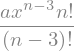

In [11]:
check = a * x**(n-k) * sm.factorial(n) / sm.factorial(n-3)
check

Take the ratio, simplify, and verify that we get 1.

In [12]:
ratio = (df3dx / check).simplify()
ratio